## **Loading DF and Preprocessing**

In [ ]:
import nltk
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv(r'/content/full_dataset_preprocessed.csv', encoding = "ISO-8859-1")

In [ ]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
from emot.emo_unicode import EMOJI_UNICODE, UNICODE_EMOJI, EMOJI_ALIAS_UNICODE, UNICODE_EMOJI_ALIAS, EMOTICONS_EMO

In [ ]:
# remove non ascii character
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()


# Replacing emoji and emoticons
def convert_emoAll(text):
  for emot in EMOTICONS_EMO:
        pattern = re.escape(emot)
        text = re.sub(pattern, "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
  else:
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

# Remove hashtags
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

# # remove usernames @username if any
def remove_users(tweet):
  '''Takes a string and removes retweet and @user information'''
  tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
  # remove tweeted at
  return tweet

# remove links
def remove_links(tweet):
  '''Takes a string and removes web links from it'''
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return tweet
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

# remove email address
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

## Using Tokenization
def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text

# Using TweetTokenizer
#def TweetToken(text):
#    token = TweetTokenizer()
#    text = token.tokenize(text)
#    text= " ".join(text)
#    return text

# remove stopwords
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords])
  return new_str

def remove_(tweet):
  tweet = re.sub('([_]+)', "", tweet)
  return tweet

# *Applying all the preprocessing functions*

In [ ]:
new_df = df
new_df['new_tweet'] = new_df.content.apply(func = convert_emoAll)
new_df['new_tweet'] = new_df.new_tweet.apply(func = lower)
new_df['hashtag'] = new_df.content.apply(func = hashtags)
new_df['new_tweet'] = new_df.new_tweet.apply(func = remove_users)
new_df['new_tweet'] = new_df.new_tweet.apply(func = clean_html)
new_df['new_tweet'] = new_df.new_tweet.apply(func = remove_links)
new_df['new_tweet'] = new_df.new_tweet.apply(func = non_ascii)
new_df['new_tweet'] = new_df.new_tweet.apply(func = email_address)
new_df['new_tweet'] = new_df.new_tweet.apply(func = removeStopWords)
new_df['new_tweet'] = new_df.new_tweet.apply(func = clean_html)
new_df['new_tweet'] = new_df.new_tweet.apply(func = punct)
#new_df['new_tweet'] = new_df.new_tweet.apply(func = TweetToken)
new_df['new_tweet'] = new_df.new_tweet.apply(func = remove_)

In [ ]:
new_df.to_csv('full_dataset_preprocessed.csv')

In [ ]:
print(new_df['new_tweet'].iloc[0],"\n")
print(new_df['new_tweet'].iloc[1],"\n")
print(new_df['new_tweet'].iloc[2],"\n")
print(new_df['new_tweet'].iloc[3],"\n")
print(new_df['new_tweet'].iloc[4],"\n")

can t wait get lil man back quiet without here he s dad s week doubt stress n wind n pain backside i ve missed autism autistic spd autismacceptance asd autismawareness autismboy adhd 

eli dad made sloppy joe pasta dinner talked sam s drinking problem family sleepy time issues eli toe nails toes happy chanukah celebrate festival lights neurodivergent autistic adhd 

spired dad meets son s challenges tech solutions lot heart creating job placement platform support autistic folks world needs dads ling honoured part program inclusivetechnologies 

miracle drug cover purpleheartvictoryhand micah dad make music promote autism awareness acceptance u2 autism asd autistic micah difficulty talking people makes videos dad voice family 

oliverscampaign oliver press challenge dad oliver autistic also cerebral palsy never stopped set mind 



## **Snscrape test dataset**

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.6 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import regex as re


In [ ]:
#Use twitter 'advanced search' and copy paste in 'query' to filter results
query = "Autism Parent (Stress OR challenges OR challenge OR issues OR difficult OR anxiety OR panic) min_faves:5 lang:en since:2018-01-01"
tweets = []
limit = 100


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

     #print(vars(tweet))
     #break
     if len(tweets) == limit:
         break
     else:
         #Probably only need tweet.content, but other options also available
         tweets.append([tweet.content])

df = pd.DataFrame(tweets, columns=['Content'])
print(df)


# to save to csv
df.to_csv('tweets.csv')

<ipython-input-7-b454946a5667>:15: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.content])


                                              Content
0   are children “all of a sudden” being born with...
1   @TheChiefNerd @RobertKennedyJr @Hillsdale Than...
2   My weekly column on issues of disability in Ma...
3   Today it is Asthma and Autism. \n\nTrip to wal...
4   @leRhanalt my parents still don't understand t...
..                                                ...
95  Parents who diagnose their kids themselves wit...
96  I am a young man with autism\nboth my parents ...
97  #AskingAutistics #Neurodivergent #Parents #Aut...
98  I fucking hate “ those “ autism parents so muc...
99  @NeurodiverseFa1 As others have said, a profil...

[100 rows x 1 columns]


## **Vader Sentiment Analysis**



In [ ]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
vaderSentiment_list = []
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe

for row in df['new_tweet']:
    tweet_list1.append(row)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(row) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
        vaderSentiment_list.append('negative')
    elif pos > neg:
        positive_list.append(row) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
        vaderSentiment_list.append('positive')
    elif pos == neg:
        neutral_list.append(row) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1
        vaderSentiment_list.append('neutral')

positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))
df['VaderSentiment'] = vaderSentiment_list
print(df)
#print(tweet_list1)

       Unnamed: 0                                            content  \
0               0  Can't wait to get my lil man back. Its been qu...   
1               1  Eli and Dad made Sloppy Joe and pasta for dinn...   
2               2  Inspired Dad meets son's challenges with tech ...   
3               3  Miracle Drug @U2 cover ðâï¸\nMicah and D...   
4               4  #Oliverscampaign Oliver doing the Press Up Cha...   
...           ...                                                ...   
10757       10757  @aacap Thanks for sharing my post. Parents of ...   
10758       10758  Parents of Children With ADHD Face Serious Str...   
10759       10759  RT @nikiglanz #Parent-Child Interaction Therap...   
10760       10760  Afraid to try to #homeschool a child with #lea...   
10761       10761  Parent-Child Interaction Therapy #ADHD #behavi...   

                                               new_tweet  \
0      can t wait get lil man back quiet without here...   
1      eli dad 

In [ ]:
#Converting lists to pandas dataframe

neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting

print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')

Positive Sentiment: 5792.00
*Neutral Sentiment: 472.00
*Negative Sentiment: 4498.00
*

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for key words related to Parenting and ASD" )
plt.axis('equal')
plt.show()
plt.savefig('Sentiment_ASD.png', bbox_inches='tight')

## **Word Cloud**

In [ ]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ASD and Parenting')
word_cloud(negative_list)
#word_cloud(df['new_tweet'].values)
plt.savefig('WordCloud_ASD.png', bbox_inches='tight')

Wordcloud for ASD and Parenting


NameError: ignored

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load CSV data into a pandas DataFrame
df2 = pd.read_csv('/content/full_dataset_preprocessed.csv')

# Concatenate all text columns into a single string
text = df['new_tweet']

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **TweetNLP**

In [ ]:
!pip install tweetnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from collections import Counter
import tweetnlp

## **TweetNLP-Topic**

In [ ]:
dataset_multi_label, label2id_multi_label = tweetnlp.load_dataset('topic_classification')
dataset_single_label, label2id_single_label = tweetnlp.load_dataset('topic_classification', multi_label=False)

NameError: ignored

In [ ]:
dataset_multi_label

DatasetDict({
    test_2020: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 376
    })
    test_2021: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 1693
    })
    train_2020: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 2858
    })
    train_2021: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 1516
    })
    train_all: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 4374
    })
    validation_2020: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 352
    })
    validation_2021: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 189
    })
    train_random: Dataset({
        features: ['text', 'date', 'label', 'label_name', 'id'],
        num_rows: 2830
    })
    validati

In [ ]:
model = tweetnlp.load_model('topic_classification', multi_label=False)  # Or `model = tweetnlp.TopicClassification(multi_label=False)`
topic_list = []
for row in new_df['new_tweet']:
  topic = model.topic(row)
  topic_list.append(topic.get('label'))

  #topic_list.append(topic.value)

Counter(topic_list)




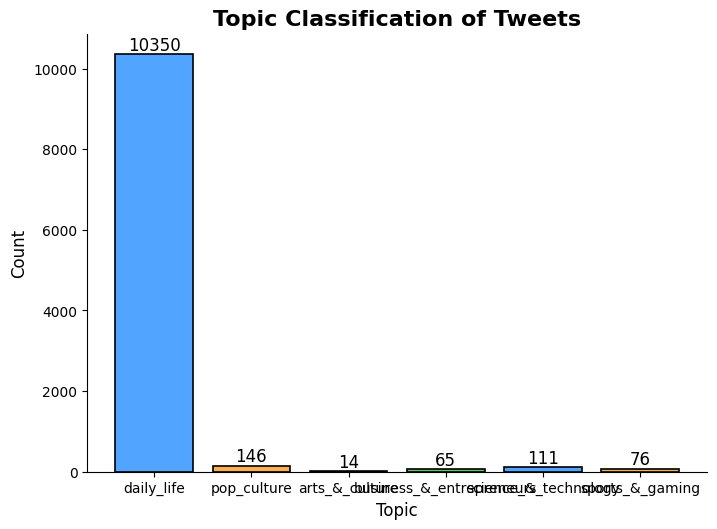

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

model = tweetnlp.load_model('topic_classification', multi_label=False)
topic_list = []
for row in new_df['new_tweet']:
  topic = model.topic(row)
  topic_list.append(topic.get('label'))

data = Counter(topic_list)

names = list(data.keys())
values = list(data.values())

# Set figure size and background color
fig = plt.figure(figsize=(8, 6), facecolor='white')

# Create bar plot with custom colors, edgecolor, and linewidth
plt.bar(range(len(data)), values, tick_label=names, color=['#51A4FF', '#FFAF51', '#FF5151', '#65C665'], edgecolor='black', linewidth=1.2)

# Set title and axis labels
plt.title('Topic Classification of Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add count labels above each bar
for i in range(len(data)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom', fontsize=12)

# Adjust spacing between bars and x-axis labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()

## **TweetNLP-Emotion**


In [ ]:
dataset_single_label, label2id_single_label = tweetnlp.load_dataset('emotion', multi_label=False)

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/3257 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1421 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/374 [00:00<?, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/emotion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
model = tweetnlp.load_model('emotion')  # Or `model = tweetnlp.TopicClassification(multi_label=False)`
emotion_list = []
for row in df['Tweet']:
  emotion = model.emotion(row)
  emotion_list.append(emotion.get('label'))


Counter(emotion_list)
data = Counter(emotion_list)

names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

KeyError: ignored

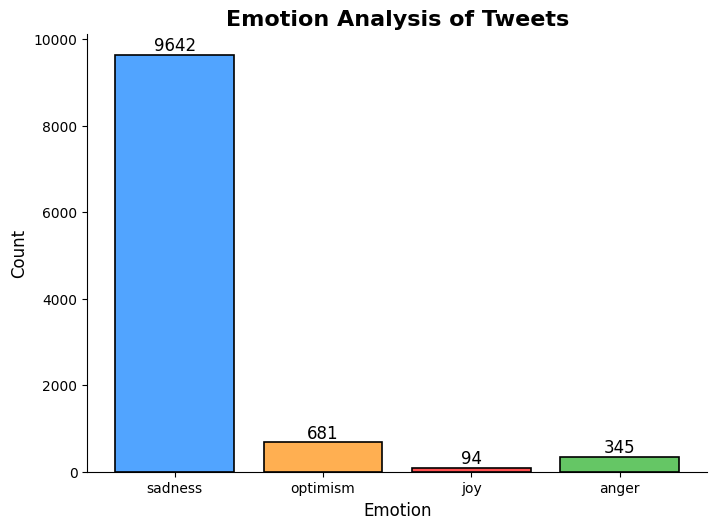

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

model = tweetnlp.load_model('emotion')
emotion_list = []
for row in new_df['new_tweet']:
  emotion = model.emotion(row)
  emotion_list.append(emotion.get('label'))

data = Counter(emotion_list)

names = list(data.keys())
values = list(data.values())

# Set figure size and background color
fig = plt.figure(figsize=(8, 6), facecolor='white')

# Create bar plot with custom colors, edgecolor, and linewidth
plt.bar(range(len(data)), values, tick_label=names, color=['#51A4FF', '#FFAF51', '#FF5151', '#65C665'], edgecolor='black', linewidth=1.2)

# Set title and axis labels
plt.title('Emotion Analysis of Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add count labels above each bar
for i in range(len(data)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom', fontsize=12)

# Adjust spacing between bars and x-axis labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()

## **TweetNLP-Sentiment**

In [ ]:
model = tweetnlp.load_model('sentiment')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


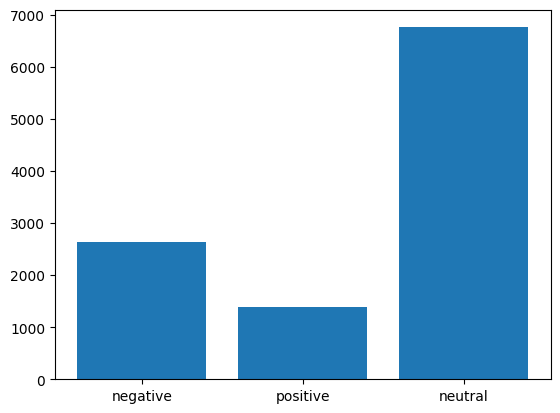

                                                 content  \
0      Can't wait to get my lil man back. Its been qu...   
1      Eli and Dad made Sloppy Joe and pasta for dinn...   
2      Inspired Dad meets son's challenges with tech ...   
3      Miracle Drug @U2 cover 💜✌️\nMicah and Dad make...   
4      #Oliverscampaign Oliver doing the Press Up Cha...   
...                                                  ...   
10757  @aacap Thanks for sharing my post. Parents of ...   
10758  Parents of Children With ADHD Face Serious Str...   
10759  RT @nikiglanz #Parent-Child Interaction Therap...   
10760  Afraid to try to #homeschool a child with #lea...   
10761  Parent-Child Interaction Therapy #ADHD #behavi...   

                                               new_tweet  \
0      can t wait get lil man back quiet without here...   
1      eli dad made sloppy joe pasta dinner talked sa...   
2      spired dad meets son s challenges tech solutio...   
3      miracle drug cover purpleheartvi

In [ ]:

sentiment_list = []
for row in df['new_tweet']:
  sentiment = model.sentiment(row)
  sentiment_list.append(sentiment.get('label'))

df['TweetNLP'] = sentiment_list
Counter(sentiment_list)
data = Counter(sentiment_list)

names = list(data.keys())
values = list(data.values())



#plt.pie(values, labels = names)
plt.bar(range(len(data)), values, tick_label=names)
plt.show()
print(df)

In [ ]:


sentiment_list = []
for row in df['content']:
  sentiment = model.sentiment(row)
  sentiment_list.append(sentiment.get('label'))

df['TweetNLP'] = sentiment_list
data = Counter(sentiment_list)

names = list(data.keys())
values = list(data.values())

# Set figure size and background color
fig = plt.figure(figsize=(8, 6), facecolor='white')

# Create bar plot with custom colors, edgecolor, and linewidth
plt.bar(range(len(data)), values, tick_label=names, color=['#51A4FF', '#FFAF51', '#FF5151'], edgecolor='black', linewidth=1.2)

# Set title and axis labels
plt.title('Sentiment Analysis of Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add count labels above each bar
for i in range(len(data)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom', fontsize=12)

# Adjust spacing between bars and x-axis labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()

KeyboardInterrupt: ignored

## **TextBlob - Sentiment analysis**


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

Positive


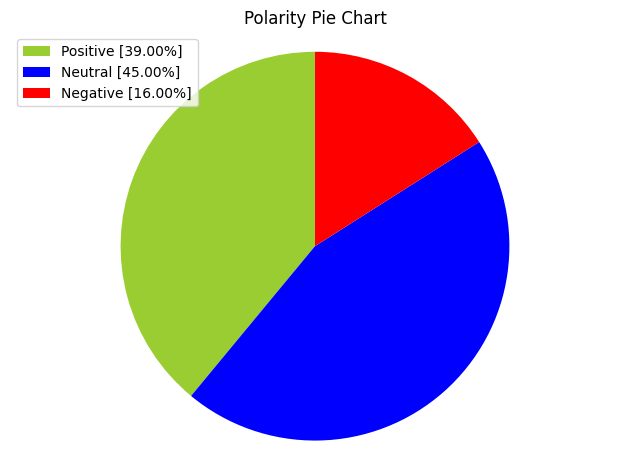

In [ ]:

def percentage(part,whole):
  return 100*float(part)/float(whole)



textblob_list = []
positive = 0
negative = 0
neutral = 0
polarity = 0


for row in df['content']:
    analyzer = TextBlob(row)
    polarity += analyzer.sentiment.polarity
    if analyzer.sentiment.polarity > 0.10:
      positive += 1
      textblob_list.append("positive")
    elif analyzer.sentiment.polarity < -0.10:
      negative += 1
      textblob_list.append("negative")
    else:
      neutral += 1
      textblob_list.append("neutral")

df['TextBlob'] = textblob_list
positive = percentage(positive,(positive + negative + neutral))
negative = percentage(negative,(positive + negative + neutral))
neutral = percentage(neutral,(positive + negative + neutral))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

if (polarity > 0.10):
    print("Positive")
elif (polarity < -0.10):
    print("Negative")
else:
    print("Neutral")

labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]',
          'Negative ['+str(negative)+'%]' ]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Polarity Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
print(df)

                                              content Manual Tagging  \
0   Can't wait to get my lil man back. Its been qu...       positive   
1   Eli and Dad made Sloppy Joe and pasta for dinn...        neutral   
2   Inspired Dad meets son's challenges with tech ...       positive   
3   Miracle Drug @U2 cover 💜✌️\nMicah and Dad make...        neutral   
4   #Oliverscampaign Oliver doing the Press Up Cha...       positive   
..                                                ...            ...   
95  The #Berkshire Adult #Autism Support Service i...        neutral   
96  parents, the actual owners are on their honeym...       positive   
97  Check out what more we're offering on our #Not...       positive   
98  Tips &amp; Tools to Manage #Anxiety - #FREE ON...        neutral   
99  Dear #Autism Parents, 🙋🏻‍♀️\n\nAt the end of a...       positive   

   VaderSentiment  TweetNLP  TextBlob  
0        negative  positive   neutral  
1        positive  positive  positive  
2        positi

In [ ]:
df.to_csv('sentiment_comparison.csv', index = False)

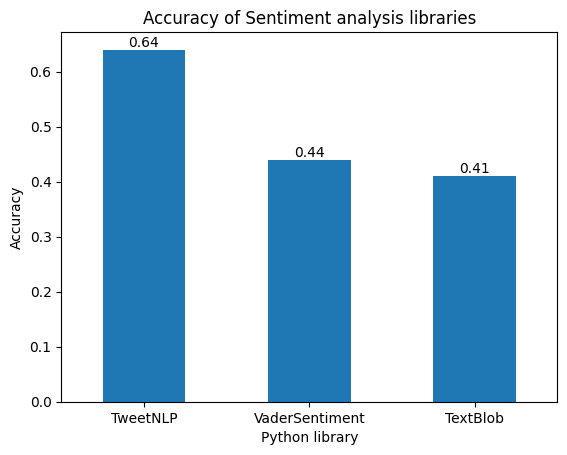

  Sentiment Column  Accuracy
0         TweetNLP      0.64
1   VaderSentiment      0.44
2         TextBlob      0.41


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/sentiment_comparison.csv')

# Extract the three sentiment columns of interest
sentiment_columns = ['TweetNLP', 'VaderSentiment', 'TextBlob']

# Calculate the accuracy for each sentiment column compared to the 'Manual Tagging' column
accuracies = []
for col in sentiment_columns:
    accuracy = accuracy_score(df['Manual Tagging'], df[col])
    accuracies.append(accuracy)

# Create a dataframe to store the accuracies
accuracy_df = pd.DataFrame({'Sentiment Column': sentiment_columns, 'Accuracy': accuracies})

# Sort the dataframe by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the accuracies as a bar chart
ax = accuracy_df.plot(x='Sentiment Column', y='Accuracy', kind='bar', legend=False)
plt.xlabel('Python library')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment analysis libraries')

# Show the accuracies as labels above the bars
for i, accuracy in enumerate(accuracies):
    ax.annotate(f'{accuracy:.2f}', xy=(i, accuracy), ha='center', va='bottom')

ax.set_xticklabels(accuracy_df['Sentiment Column'], rotation=0)
# Show the chart
#ax.set_xticklabels(rotation=0)
plt.show()
print(accuracy_df)

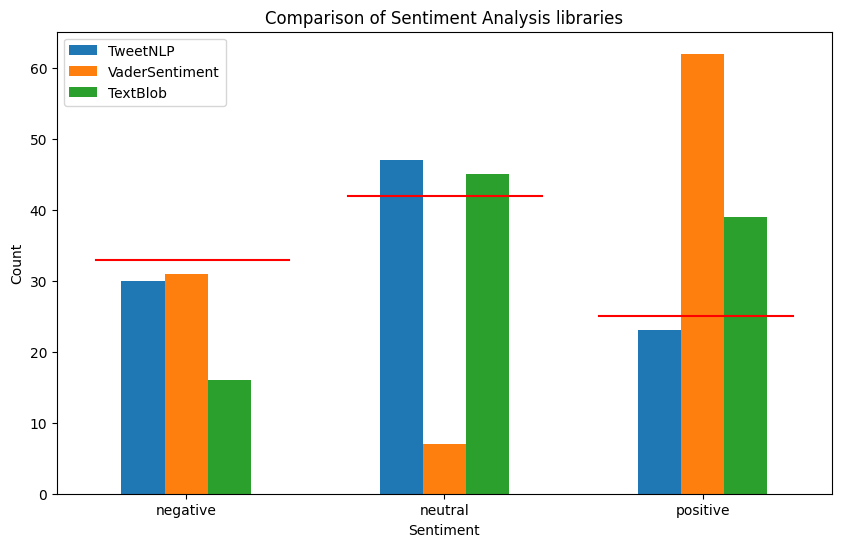

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/sentiment_comparison.csv')

# Extract the three sentiment columns of interest
sentiment_columns = ['TweetNLP', 'VaderSentiment', 'TextBlob']
sentiment_counts = df[sentiment_columns].apply(pd.Series.value_counts)

# Count the occurrences of each unique value in the Manual Tagging column
target_column = df['Manual Tagging']  # Replace 'Manual Tagging' with the actual column name containing the target values
target_counts = target_column.value_counts()

# Combine the sentiment counts and target counts into a single dataframe
counts_df = pd.concat([sentiment_counts, target_counts], axis=1)
counts_df.columns = sentiment_columns + ['Manual Tagging']

# Plot the counts as a bar chart without the 'Manual Tagging' column
ax = counts_df[sentiment_columns].plot(kind='bar', figsize=(10, 6))  # Adjust the figure size as needed
plt.xticks(rotation=90)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Sentiment Analysis libraries')

# Add target line to the chart
for value in target_counts.index:
    if value == 'neutral':  # Modify this condition to specify the target column
        index = counts_df.index.get_loc(value)
        ax.axhline(y=target_counts[value],xmin=.375, xmax=.626, color='red', linestyle='-', label=f'Target: {value}')

    elif value == 'positive':  # Modify this condition to specify the target column
      index = counts_df.index.get_loc(value)
      ax.axhline(y=target_counts[value],xmin=.7, xmax=.95, color='red', linestyle='-', label=f'Target: {value}')

    elif value == 'negative':  # Modify this condition to specify the target column
      index = counts_df.index.get_loc(value)
      ax.axhline(y=target_counts[value],xmin=.05, xmax=.3, color='red', linestyle='-', label=f'Target: {value}')

# Show the legend
#plt.legend()

# Rotate xtick labels by 90 degrees
ax.set_xticklabels(counts_df.index, rotation=0)




# Show the chart
plt.show()

<Figure size 1000x600 with 0 Axes>

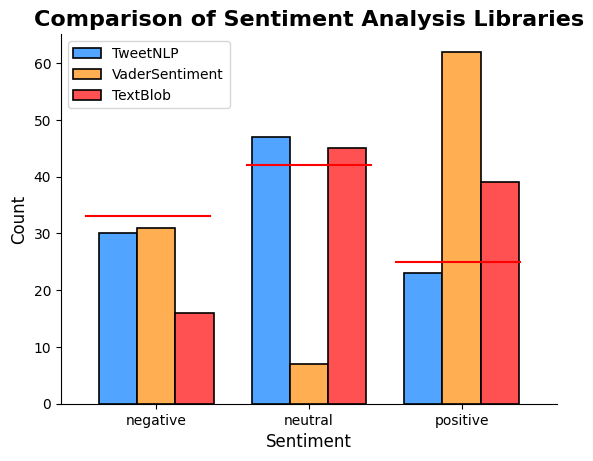

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/sentiment_comparison.csv')

# Extract the three sentiment columns of interest
sentiment_columns = ['TweetNLP', 'VaderSentiment', 'TextBlob']
sentiment_counts = df[sentiment_columns].apply(pd.Series.value_counts)

# Count the occurrences of each unique value in the Manual Tagging column
target_column = df['Manual Tagging']  # Replace 'Manual Tagging' with the actual column name containing the target values
target_counts = target_column.value_counts()

# Combine the sentiment counts and target counts into a single dataframe
counts_df = pd.concat([sentiment_counts, target_counts], axis=1)
counts_df.columns = sentiment_columns + ['Manual Tagging']

# Set figure size and background color
fig = plt.figure(figsize=(10, 6), facecolor='white')

# Create bar plot with custom colors, edgecolor, and linewidth
ax = counts_df[sentiment_columns].plot(kind='bar', width=0.75, color=['#51A4FF', '#FFAF51', '#FF5151'], edgecolor='black', linewidth=1.2)

# Add target line to the chart
for value in target_counts.index:
    if value == 'neutral':  # Modify this condition to specify the target column
        index = counts_df.index.get_loc(value)
        ax.axhline(y=target_counts[value], xmin=0.375, xmax=0.626, color='red', linestyle='-', label=f'Target: {value}')

    elif value == 'positive':  # Modify this condition to specify the target column
        index = counts_df.index.get_loc(value)
        ax.axhline(y=target_counts[value], xmin=0.675, xmax=0.925, color='red', linestyle='-', label=f'Target: {value}')

    elif value == 'negative':  # Modify this condition to specify the target column
        index = counts_df.index.get_loc(value)
        ax.axhline(y=target_counts[value], xmin=0.05, xmax=0.3, color='red', linestyle='-', label=f'Target: {value}')

# Set title and axis labels
plt.title('Comparison of Sentiment Analysis Libraries', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis tick labels rotation to 0 degrees
ax.set_xticklabels(counts_df.index, rotation=0)

# Add count labels above each bar
#for i in range(len(counts_df)):
 #   for sentiment_col in sentiment_columns:
    #    value = counts_df[sentiment_col][i]
     #   plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

# Show the legend
#plt.legend()

# Show the chart
plt.show()